In [1962]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [1963]:
old =  pd.read_csv('old.csv',index_col=False)
old['CLSTAR_TOTAL_SYM']

0      52340160
1      60391076
2      58036419
3      59987735
4      58328879
         ...   
142    38164167
143    40282301
144    41587436
145    42286395
146    42448330
Name: CLSTAR_TOTAL_SYM, Length: 147, dtype: int64

In [1964]:
# new = old.copy()


new =  pd.read_csv('new.csv',index_col=False)

In [1965]:
# random_values = np.random.randint(2, 10, size=len(new))

# new['CLSTAR_TOTAL_RST'] = new['CLSTAR_TOTAL_RST'] * random_values
# new['CLSTAR_TOTAL_RST']

In [1966]:
# random_values = np.random.randint(1, 10, size=len(new))

# new['LSTAR_TOTAL_RST'] = new['LSTAR_TOTAL_RST'] * random_values
# new['LSTAR_TOTAL_RST']

In [1967]:
# random_values = np.random.randint(1, 5, size=len(new))

# new['LSTAR_TOTAL_SYM'] = new['LSTAR_TOTAL_SYM'] * random_values
# new['LSTAR_TOTAL_SYM']

In [ ]:
# random_values = np.random.randint(1, 9, size=len(new))
# vals = random_values * 100000

# new['LSTAR_TOTAL_RST'] = new['LSTAR_TOTAL_RST'] + vals

In [ ]:
# random_values = np.random.randint(1, 9, size=len(new))
# vals = random_values * 100000

# new['CLSTAR_TOTAL_RST'] = new['CLSTAR_TOTAL_RST'] + vals

In [1970]:
# random_values = np.random.randint(1, 3, size=len(new))
# vals = random_values * 1000000

# new['LSTAR_TOTAL_RST'] = new['LSTAR_TOTAL_RST'] + vals

In [1971]:
# random_values = np.random.randint(-9, 3, size=len(new))
# vals = random_values * 100000

# new['CLSTAR_TOTAL_RST'] = new['CLSTAR_TOTAL_RST'] + vals

In [1972]:
new['STATES']

0        194.958513
1        194.958513
2        194.958513
3        127.951575
4        127.951575
           ...     
142    22708.173523
143    22708.173523
144    14051.809589
145    14051.809589
146    14051.809589
Name: STATES, Length: 147, dtype: float64

In [1973]:
# state_factors = {
#     state: np.random.uniform(0.9, 1.1)
#     for state in new['STATES'].unique()
# }

# # apply the factor based on STATES value
# new['STATES'] = new['STATES'] * new['STATES'].map(state_factors)

# new['STATES'] = new['STATES'].clip(lower=100)
# new['STATES'] = new['STATES'].clip(upper=30000)
# new['STATES']

In [ ]:
new['STATES'] = new['STATES'].round().astype(int)

In [1974]:
f = open("../Configs/States.txt", "r")
minNumOfStates = int (f.readline())
maxNumOfStates = int(f.readline())

In [1975]:
realTestsDf =  pd.read_csv('../Results/Parameters/Real Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Mesh/Results.csv', index_col=False)
busTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Bus/Results.csv', index_col=False)
bipartiteTestsDf = pd.read_csv('../Results/Parameters/Generated Tests/Bipartite/Results.csv', index_col=False)

types = ['Real Tests', 'Point-To-Point Tests', 'Ring Tests', 'Star Tests', 'Mesh Tests', 'Bus Tests', 'Bipartite Tests']
allTests = {'Real Tests' : realTestsDf, 'Point-To-Point Tests' : p2pTestsDf, 'Ring Tests' : ringTestsDf,
            'Star Tests' : starTestsDf, 'Mesh Tests' : meshTestsDf, 'Bus Tests' : busTestsDf, 'Bipartite Tests' : bipartiteTestsDf}

In [1976]:
def plotSingleTypeData(data, testType, yCol1, yCol2, yLabel):
    # filtered_df = (
    #     data
    #     .sort_values('CLSTAR_TOTAL_SYM')
    #     .drop_duplicates(
    #         subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
    #         keep='first'
    #     )
    #     .copy()
    # )


    # filtered_df = filtered_df.assign(
    #     diff = filtered_df['LSTAR_TOTAL_SYM'] - filtered_df['CLSTAR_TOTAL_SYM']
    # )

    # filtered_df['score'] = filtered_df['diff']

    # result = (
    # filtered_df
    # .sort_values(['CLSTAR_COMPONENTS', 'score'], ascending=[True, True])
    # .groupby('CLSTAR_COMPONENTS', as_index=False)
    # .head(100)
    # )


    # result = data[10 * data['LSTAR_TOTAL_SYM'] >= data['CLSTAR_TOTAL_SYM']]

    d2 = data[['STATES', 'CLSTAR_COMPONENTS', yCol1, yCol2]]
    
    d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states', '#components'])
    
    d2 = d2[['L*', 'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: yLabel})
    
    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=[yLabel],
                     hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g'])
    g.fig.suptitle(testType, y=1.08)
    delta = int((maxNumOfStates - minNumOfStates + int(maxNumOfStates / 300)) / 60)
    g.axes[0, 0].set_xlim((minNumOfStates - delta, maxNumOfStates + delta))
    
    # Set x-axis to display only integer values
    g.axes[0, 1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.yscale('log')
    if testType == 'Wanted Tests':
        if yLabel == "Total Number of Input Symbols":
            plt.savefig("Results/Plots/Symbols.png")
        else:
            plt.savefig("Results/Plots/Resets.png")


In [1977]:
def selectTests(data, testType):
    print(testType + ":")
    for componentCounter in range(2, 10):
        currentSelected = data[data["CLSTAR_COMPONENTS"] == componentCounter]
        currentSelected = currentSelected[(currentSelected["STATES"] >= 100) & (currentSelected["STATES"] <= 30000)]
        print("\t For" + str(componentCounter) + " Components: " + str(len(currentSelected)) + ' Tests')
        if componentCounter == 2:
            selected = currentSelected
        else:
            selected = pd.concat([selected, currentSelected], ignore_index=True, sort=False)

    # selected = (
    #         selected
    #         .sort_values('CLSTAR_TOTAL_SYM')
    #         .drop_duplicates(
    #             subset=['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'],
    #             keep='first'
    #         )
    #         .copy()
    #     )
    # selected = (
    #     selected
    #     .sort_values(['CLSTAR_COMPONENTS', 'CLSTAR_TOTAL_SYM'], ascending=[True, False])
    #     .groupby('CLSTAR_COMPONENTS', as_index=False)
    #     .head(21)
    # )
    return selected


In [1978]:
new = selectTests(new, 'Real Tests')

Real Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 48 Tests
	 For7 Components: 9 Tests
	 For8 Components: 0 Tests
	 For9 Components: 0 Tests


C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A v

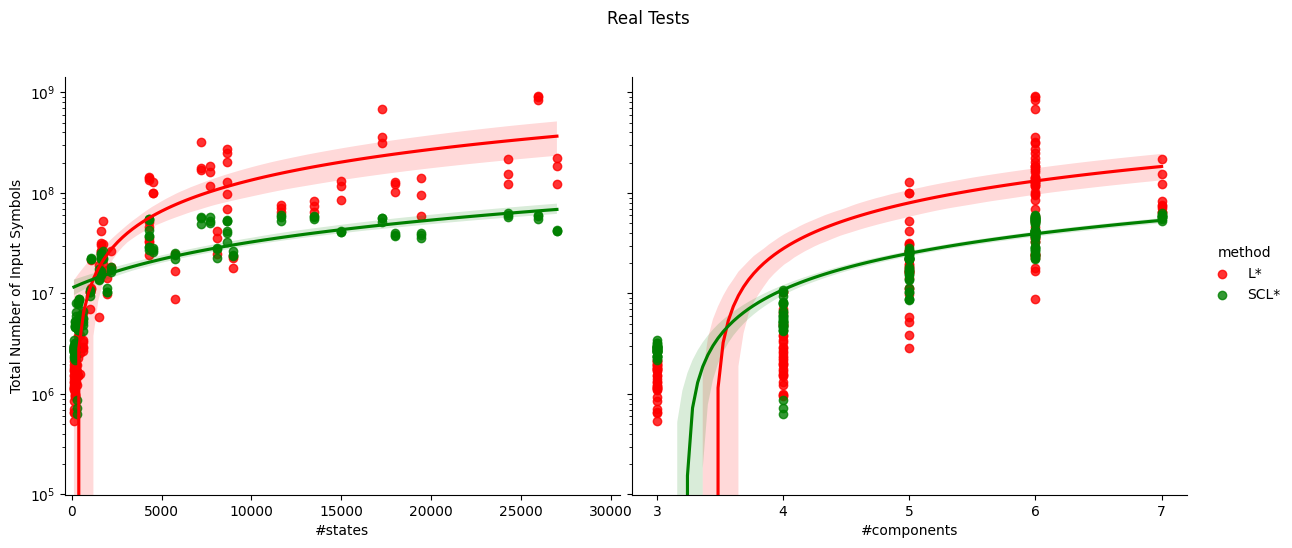

In [1979]:
plotSingleTypeData(old, 'Real Tests', "LSTAR_TOTAL_SYM", "CLSTAR_TOTAL_SYM", "Total Number of Input Symbols")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A v

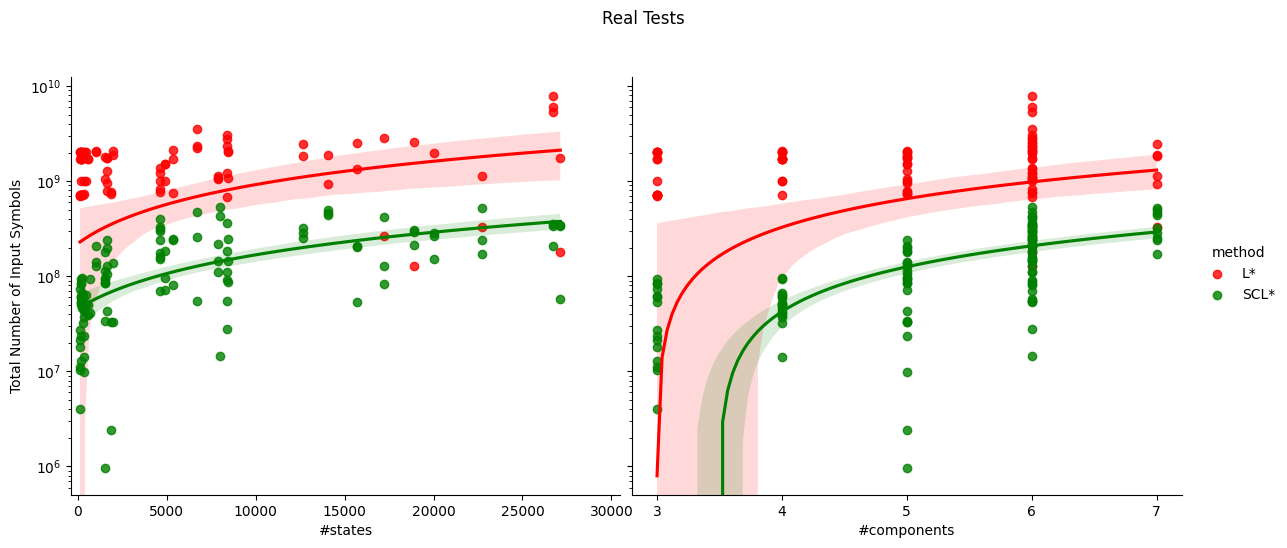

In [1980]:
plotSingleTypeData(new, 'Real Tests', "LSTAR_TOTAL_SYM", "CLSTAR_TOTAL_SYM", "Total Number of Input Symbols")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A v

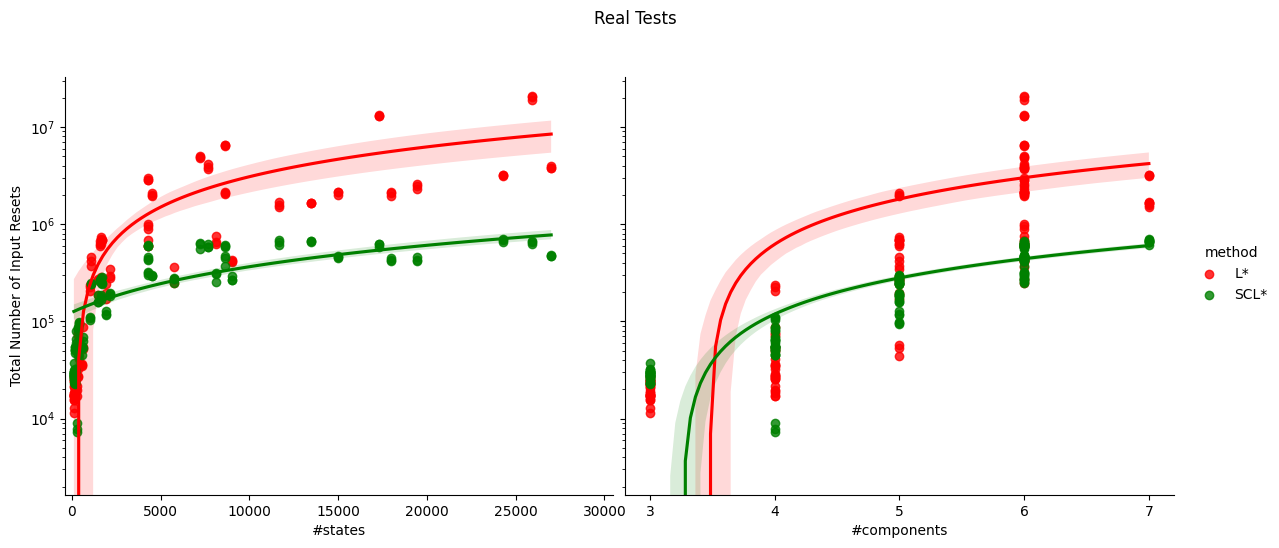

In [1981]:
plotSingleTypeData(old, 'Real Tests', "LSTAR_TOTAL_RST", "CLSTAR_TOTAL_RST", "Total Number of Input Resets")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_5832\460915464.py:31: SettingWithCopyWarning: 
A v

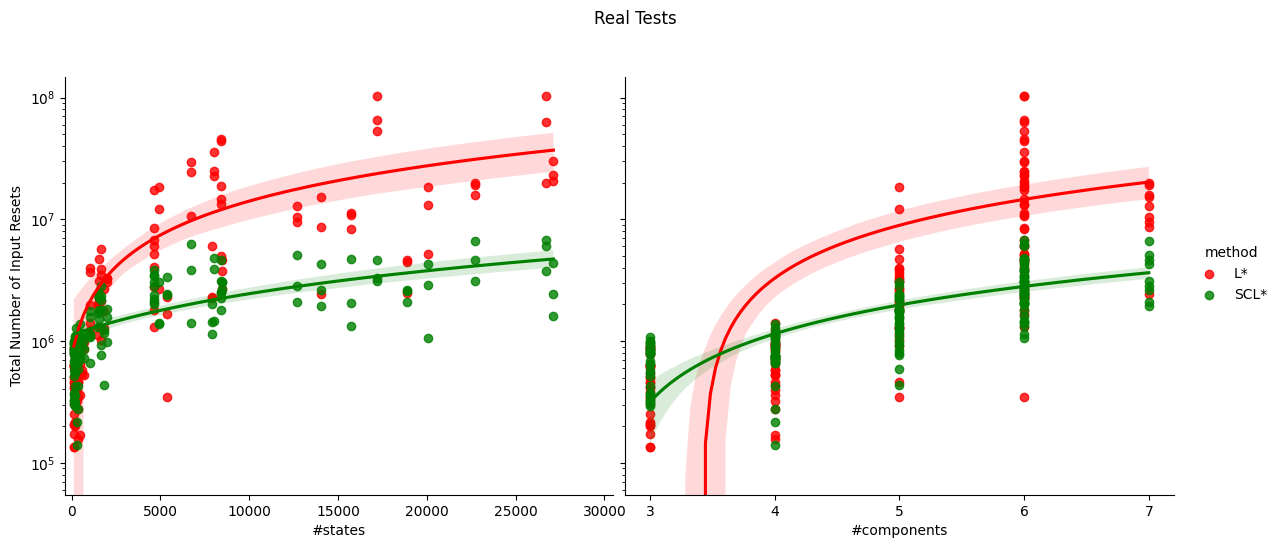

In [1982]:
plotSingleTypeData(new, 'Real Tests', "LSTAR_TOTAL_RST", "CLSTAR_TOTAL_RST", "Total Number of Input Resets")

In [ ]:
# new.to_csv("new.csv")